

 





### **DATASET USED AND ITS ATTRIBUTES:**

The datasets used is Cats and dogs dataset.
CATS AND DOGS DATASET:
The above dataset consists of two folders train and test. In train data it consists of
20000 images of cats and dogs with name as cat.n.jpg where n is the integer. The test
data consists of 2000 images labelled as n.jpg where n is integer. We have to train our
model on train data and test its accuracy on test data. Following are the sample image
of train and test data:


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D

In [ ]:
files = os.listdir("C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\cat_dog\\train")
class_image = []
for x in files:
  output = x.split('.')[0]
  if(output == 'dog'):
    class_image.append('dog')
  else:
    class_image.append('cat')
df = pd.DataFrame({'filename':files, 'class':class_image})

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
total_train = train.shape[0]
total_test = test.shape[0]

In [ ]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
train_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

validation_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_gen.flow_from_dataframe(
    train, 
    "C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\cat_dog\\train", 
    x_col='filename',
    y_col='class',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    test, 
    "C:\\Users\\sid\\Desktop\\4th year\\ML\\Lab\\cat_dog\\train", 
    x_col='filename',
    y_col='class',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
model = VGG16(weights = 'imagenet', include_top = False)
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation = 'softmax')(x)
model_vgg16 = Model(inputs = model.input, outputs = predictions)
for layer in model.layers:
  layer.trainable = False

In [ ]:
model_vgg16.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
epochs=10
history = model_vgg16.fit(
    train_generator, 
    epochs=10,
    validation_data=validation_generator
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1334 steps, validate for 334 steps
Epoch 1/10
1334/1334 [==============================] - 132s 99ms/step - loss: 0.3949 - accuracy: 0.8182 - val_loss: 0.3158 - val_accuracy: 0.8630
Epoch 2/10
1334/1334 [==============================] - 138s 103ms/step - loss: 0.3398 - accuracy: 0.8513 - val_loss: 0.3030 - val_accuracy: 0.8646
Epoch 3/10
1334/1334 [==============================] - 145s 109ms/step - loss: 0.3268 - accuracy: 0.8572 - val_loss: 0.2961 - val_accuracy: 0.8756
Epoch 4/10
1334/1334 [==============================] - 147s 110ms/step - loss: 0.3195 - accuracy: 0.8611 - val_loss: 0.2785 - val_accuracy: 0.8852
Epoch 5/10
1334/1334 [==============================] - 148s 111ms/step - loss: 0.3179 - accuracy: 0.8602 - val_loss: 0.2755 - val_accuracy: 0.8848
Epoch 6/10
1334/1334 [==============================] - 148s 111ms/step - loss: 0.3028 - accuracy: 0.8718 - val_loss: 0.2898 - val_accuracy: 0.8838
Epoch 7/10
1334/13

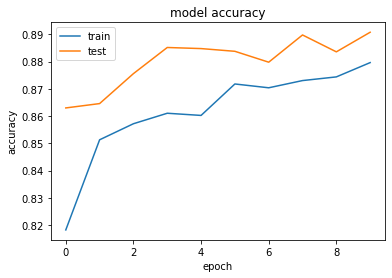

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

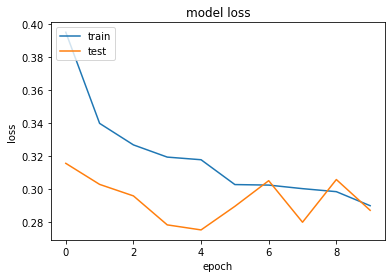

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_vgg16.evaluate(train_generator)

  ...
    to  
  ['...']
1334/1334 [==============================] - 114s 86ms/step - loss: 0.2920 - accuracy: 0.8828


[0.2919785101371615, 0.8828]

In [ ]:
model_vgg16.evaluate(validation_generator)

  ...
    to  
  ['...']
334/334 [==============================] - 16s 46ms/step - loss: 0.2874 - accuracy: 0.8908


[0.2873507780622423, 0.8908]

In [ ]:
model.save("VGG16-sid.h5")

### **Analysis:**

We observe that using a less complex model here, which is Pre-trained MobileNet v2, the data

well and outputs less loss n more accuracy as compared to ResNet-50 , VGG16

## **Conclusion:**

After doing this experiment we learn how to use various Pre-trained deep learning model and train
them on a custom dataset